Huffman Compressed Size:  1957564
Run-Length Encoded Size:  2322126
JPEG Compressed File: compressed_image.jpg


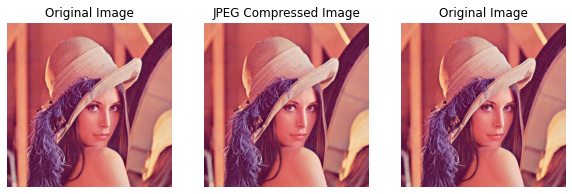

In [3]:
import cv2
import numpy as np
import heapq
import os
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt


# ------------------------------------------------------
# Huffman Coding Implementation (Lossless Compression)
# ------------------------------------------------------

class Node:
    def __init__(self, value, frequency):
        self.value = value
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(data):
    heap = [Node(value, freq) for value, freq in data.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(None, left.frequency + right.frequency)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)

    return heap[0]

def generate_huffman_codes(node, current_code="", codes={}):
    if node is not None:
        if node.value is not None:
            codes[node.value] = current_code
        generate_huffman_codes(node.left, current_code + "0", codes)
        generate_huffman_codes(node.right, current_code + "1", codes)
    return codes

def huffman_compress(image):
    # Convert the image to grayscale and flatten it
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat_image = gray_image.flatten()

    # Count frequency of each pixel value
    frequency = defaultdict(int)
    for pixel in flat_image:
        frequency[pixel] += 1

    # Build Huffman Tree and generate codes
    huffman_tree = build_huffman_tree(frequency)
    codes = generate_huffman_codes(huffman_tree)

    # Compress the image using the Huffman codes
    compressed = "".join(codes[pixel] for pixel in flat_image)
    return compressed, codes, gray_image

# ------------------------------------------------------
# Run-Length Encoding Implementation (Lossless Compression)
# ------------------------------------------------------

def run_length_encode(image):
    # Convert the image to grayscale and flatten it
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flat_image = gray_image.flatten()

    # Run-Length Encoding
    encoding = []
    prev_pixel = flat_image[0]
    count = 1
    for pixel in flat_image[1:]:
        if pixel == prev_pixel:
            count += 1
        else:
            encoding.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    encoding.append((prev_pixel, count))  # For the last run
    return encoding, gray_image

# ------------------------------------------------------
# JPEG Compression (Lossy Compression)
# ------------------------------------------------------

def jpeg_compress(image, quality=90):
    # Convert image to JPEG format using PIL (quality can be adjusted)
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    pil_image.save("compressed_image.jpg", "JPEG", quality=quality)
    return "compressed_image.jpg"

# ------------------------------------------------------
# Testing the Compression Methods
# ------------------------------------------------------

# Load an example image (you can change this to any image)
image = cv2.imread('images/image7.tif')

# Huffman Compression
compressed_huffman, huffman_codes, _ = huffman_compress(image)
print("Huffman Compressed Size: ", len(compressed_huffman))

# Run-Length Encoding Compression
encoded_rle, _ = run_length_encode(image)
print("Run-Length Encoded Size: ", len(str(encoded_rle)))

# JPEG Compression (Lossy)
jpeg_file = jpeg_compress(image, quality=80)  # Example quality = 80
print(f"JPEG Compressed File: {jpeg_file}")

# ------------------------------------------------------
# Visualization for Comparison
# ------------------------------------------------------

# Show the original image and the result of JPEG compression
compressed_image = cv2.imread(jpeg_file)

# Plot the images
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB))
plt.title("JPEG Compressed Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cv2.imread('images/image7.tif'), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.show()
